# Library

In [1]:
import cv2
import os
import numpy as np
from sklearn import svm
from skimage import exposure, feature
from imutils import paths
import matplotlib.pyplot as plt
import argparse
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, log_loss
import seaborn as sns
import pandas as pd
import random
import shutil

# Local Binary Pattern (Numpoints=48, radius 1)

In [2]:
# Local Binnary Patterns (LBP) class
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):
        lbp = feature.local_binary_pattern(image, self.numPoints,
                                           self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                  bins=np.arange(0, self.numPoints + 3),
                                  range=(0, self.numPoints + 2))

        # Normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)

        return hist

In [3]:
# Initialize the local binary patterns descriptor along with
desc = LocalBinaryPatterns(48, 1)

In [4]:
# Specify the paths to the training and testing images
training_path = "Dataset/Train"
testing_path = "Dataset/Test"

In [5]:
# Initialize the data and label lists
data = []
labels = []

# Loop over the training images
for imagePath in paths.list_images(training_path):
    # Load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)

    # Extract the label from the image path, then update the
    # label and data lists
    labels.append(imagePath.split(os.path.sep)[-2])
    data.append(hist)

In [6]:
# Check the length of the data and labels
print('Length of the data:', len(data))
print('Length of the labels:', len(labels))

# Check the label names
print('Label names:', np.unique(labels))

# Check the shape of the data
print('Shape of the data:', np.shape(data))

# Check the data each label
print('Number of positive images:', labels.count('Positive'))
print('Number of negative images:', labels.count('Negative'))

Length of the data: 32000
Length of the labels: 32000
Label names: ['Negative' 'Positive']
Shape of the data: (32000, 50)
Number of positive images: 16000
Number of negative images: 16000


# Training Model Linear SVM

In [7]:
# Train a Linear SVM on the data
model_svml = svm.SVC(kernel='linear', probability=True, random_state=42)
model_svml.fit(data, labels)

SVC(kernel='linear', probability=True, random_state=42)

# Training Model RBF SVM

In [8]:
# Train a RBF SVM on the data
model_svmr = svm.SVC(kernel='rbf', probability=True, random_state=42)
model_svmr.fit(data, labels)

SVC(probability=True, random_state=42)

# Training Model Poly SVM

In [9]:
# Train a Polynomial SVM on the data
model_svmp = svm.SVC(kernel='poly', probability=True, random_state=42)
model_svmp.fit(data, labels)

SVC(kernel='poly', probability=True, random_state=42)

# Training Model Sigmoid SVM

In [10]:
# Train a Sigmoid SVM on the data
model_svms = svm.SVC(kernel='sigmoid', probability=True, random_state=42)
model_svms.fit(data, labels)

SVC(kernel='sigmoid', probability=True, random_state=42)

# Confussion Matrix & Classification Report Linear SVM

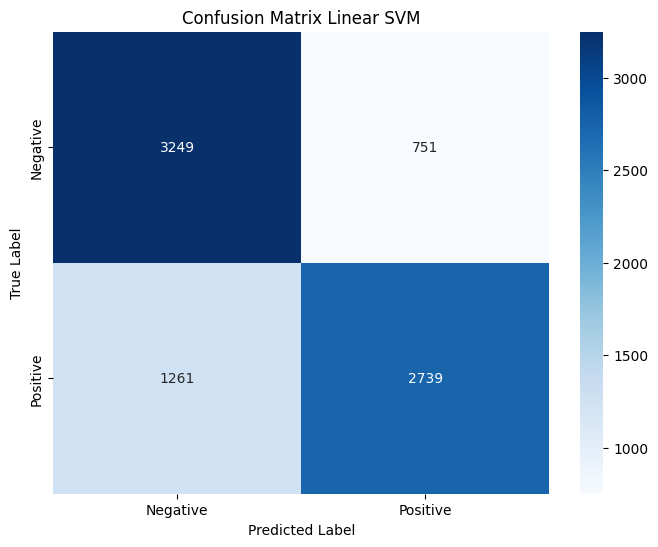

In [11]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_svml.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_svml_n48r1 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_svml_n48r1)

# Get the F1 score
f1_score_svml_n48r1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_svml_n48r1)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.7204    0.8123    0.7636      4000
    Positive     0.7848    0.6847    0.7314      4000

    accuracy                         0.7485      8000
   macro avg     0.7526    0.7485    0.7475      8000
weighted avg     0.7526    0.7485    0.7475      8000

Accuracy Score: 0.7485
F1 Score: 0.7474737174046399


# Confussion Matrix & Classification Report RBF SVM

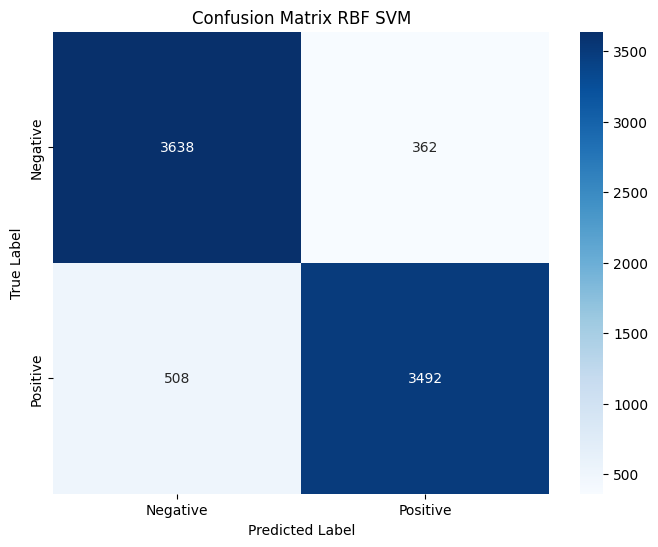

In [13]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_svmr.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_svmr_n48r1 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_svmr_n48r1)

# Get the F1 score
f1_score_svmr_n48r1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_svmr_n48r1)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.8775    0.9095    0.8932      4000
    Positive     0.9061    0.8730    0.8892      4000

    accuracy                         0.8912      8000
   macro avg     0.8918    0.8912    0.8912      8000
weighted avg     0.8918    0.8912    0.8912      8000

Accuracy Score: 0.89125
F1 Score: 0.8912137673853997


# Confussion Matrix & Classification Report Poly SVM

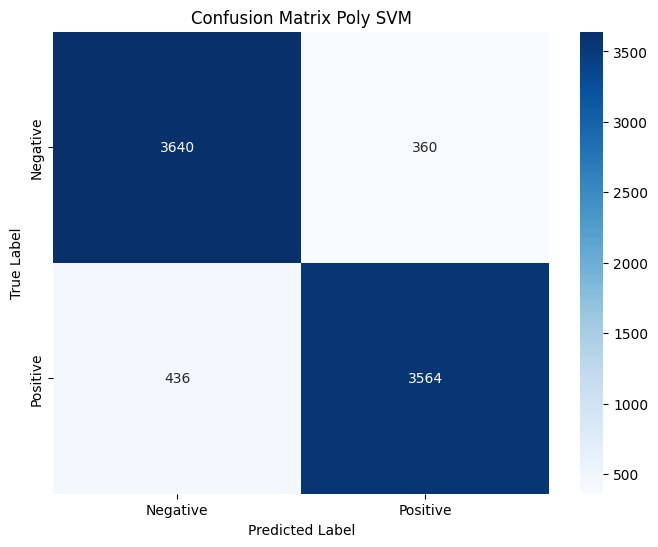

In [15]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_svmp.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Poly SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_svmp_n48r1 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_svmp_n48r1)

# Get the F1 score
f1_score_svmp_n48r1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_svmp_n48r1)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.8930    0.9100    0.9014      4000
    Positive     0.9083    0.8910    0.8995      4000

    accuracy                         0.9005      8000
   macro avg     0.9006    0.9005    0.9005      8000
weighted avg     0.9006    0.9005    0.9005      8000

Accuracy Score: 0.9005
F1 Score: 0.900491019314493


# Confussion Matrix & Classification Report Sigmoid SVM

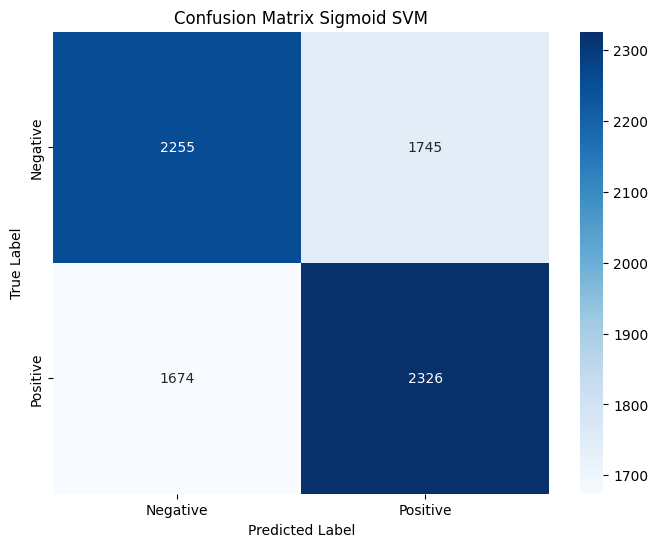

In [17]:
# Initialize empty lists for true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over the testing images
for imagePath in paths.list_images(testing_path):
    # Load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model_svms.predict(hist.reshape(1, -1))

    # Extract the true label from the image path
    true_label = imagePath.split(os.path.sep)[-2]

    # Update the lists
    true_labels.append(true_label)
    predicted_labels.append(prediction[0])

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix Sigmoid SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
# Get the classification report
class_report = classification_report(true_labels, predicted_labels, digits=4)
print("Classification Report:\n", class_report)

# Get the accuracy score
acc_score_svms_n48r1 = accuracy_score(true_labels, predicted_labels)
print("Accuracy Score:", acc_score_svms_n48r1)

# Get the F1 score
f1_score_svms_n48r1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1_score_svms_n48r1)

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5739    0.5637    0.5688      4000
    Positive     0.5714    0.5815    0.5764      4000

    accuracy                         0.5726      8000
   macro avg     0.5726    0.5726    0.5726      8000
weighted avg     0.5726    0.5726    0.5726      8000

Accuracy Score: 0.572625
F1 Score: 0.5725913348893621


# Wrap Up

In [19]:
# wrap the models in a list
# make dict of models to loop through
model = {
    "Linear SVM NumPoint = 48 Radius = 1": model_svml,
    "RBF SVM NumPoint = 48 Radius = 1": model_svmr,
    "Polynomial SVM NumPoint = 48 Radius = 1": model_svmp,
    "Sigmoid SVM NumPoint = 48 Radius = 1": model_svms
}

# Make dict of accuracy scores to loop through
acc_score = {
    "Linear SVM NumPoint = 48 Radius = 1": acc_score_svml_n48r1,
    "RBF SVM NumPoint = 48 Radius = 1": acc_score_svmr_n48r1,
    "Polynomial NumPoint = 48 Radius = 1": acc_score_svmp_n48r1,
    "Sigmoid SVM NumPoint = 48 Radius = 1": acc_score_svms_n48r1
}

# Make dict of F1 scores to loop through
f1_score = {
    "Linear SVM NumPoint = 48 Radius = 1": f1_score_svml_n48r1,
    "RBF SVM NumPoint = 48 Radius = 1": f1_score_svmr_n48r1,
    "Polynomial SVM NumPoint = 48 Radius = 1": f1_score_svmp_n48r1,
    "Sigmoid SVM NumPoint = 48 Radius = 1": f1_score_svms_n48r1
}

# Make DataFrame of all the scores
df = pd.DataFrame(list(acc_score.items()), columns=['Model', 'Accuracy Score'])
df['F1 Score'] = f1_score.values()

# Sort the values by f1 score
df.sort_values(by=['F1 Score'], inplace=True, ascending=False)

# Display the DataFrame
print(df)

                                  Model  Accuracy Score  F1 Score
2   Polynomial NumPoint = 48 Radius = 1        0.900500  0.900491
1      RBF SVM NumPoint = 48 Radius = 1        0.891250  0.891214
0   Linear SVM NumPoint = 48 Radius = 1        0.748500  0.747474
3  Sigmoid SVM NumPoint = 48 Radius = 1        0.572625  0.572591


In [20]:
# Save all the model
import pickle
# model as a pickle file
model_svml_pkl_file = "svml_n48r1.pkl"
model_svmr_pkl_file = "svmr_n48r1.pkl"
model_svmp_pkl_file = "svmp_n48r1.pkl"
model_svms_pkl_file = "svms_n48r1.pkl"

with open(model_svml_pkl_file, 'wb') as file:  
    pickle.dump(model_svml, file)

with open(model_svmr_pkl_file, 'wb') as file:
    pickle.dump(model_svmr, file)

with open(model_svmp_pkl_file, 'wb') as file:
    pickle.dump(model_svmp, file)

with open(model_svms_pkl_file, 'wb') as file:
    pickle.dump(model_svms, file)